# Naija Sales Insights: A Retail Data Analysis
This project analyzes retail sales data in Nigeria using Python (pandas, seaborn, matplotlib). Key insights include top-selling products, sales trends over time, and customer behavior.

Objectives

- Understand overall sales performance using basic statistics
- Identify the top-selling products and categories
- Analyze sales trends over time (daily and monthly)
- Evaluate customer payment behavior
- Compare sales across different Nigerian locations

Technologies Used

- **Python**
- **Pandas** (data analysis)
- **Seaborn** and **Matplotlib** (visualization)
- **Jupyter Notebook** (IDE/environment)
- **Excel** (raw sales data input)


In [ ]:
Key Insights

- Lagos recorded the highest total sales among all locations.
- The top-selling products included [HP laptop, iPhone 12, Ariel detergent, Golden Morn, Fan milk]
- Cash and POS were the most common payment methods.
- Monthly sales showed a steady decline in February (2024-02).
Ceartain categories like **[Electronics]** drove more revenue than others.

In [ ]:
Conclusion

This sales analysis helps stakeholders identify which products and locations drive the most revenue. Future strategy can focus on:
- Expanding stock for top-selling items
- Offering targeted promotions in high-performing cities
- Optimizing payment channels based on customer preferences

In [3]:
pip install pandas matplotlib seaborn openpyxl

In [5]:
import pandas as pd

In [17]:
df = pd.read_excel(r"C:\Users\seanm\OneDrive\Documents\naija_sales_data.xlsx")

In [19]:
df.head()

,Date,Invoice ID,Product,Category,Quantity,Unit Price,Total,Customer Name,Location,Payment Method
0,2024-03-22,INV1001,HP Laptop,Electronics,3,398695,1196085,Aisha,Port Harcourt,USSD
1,2024-02-27,INV1002,HP Laptop,Electronics,1,329562,329562,Tunde,Kano,Cash
2,2024-03-22,INV1003,Fan Milk,Beverages,4,1304,5216,Ibrahim,Abuja,POS
3,2024-01-21,INV1004,Sunlight Soap,Household,4,3893,15572,Tunde,Ibadan,Transfer
4,2024-01-24,INV1005,HP Laptop,Electronics,4,432810,1731240,Tunde,Abuja,POS


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            300 non-null    object
 1   Invoice ID      300 non-null    object
 2   Product         300 non-null    object
 3   Category        300 non-null    object
 4   Quantity        300 non-null    int64 
 5   Unit Price      300 non-null    int64 
 6   Total           300 non-null    int64 
 7   Customer Name   300 non-null    object
 8   Location        300 non-null    object
 9   Payment Method  300 non-null    object
dtypes: int64(3), object(7)
memory usage: 23.6+ KB


In [23]:
df.shape

(300, 10)

In [25]:
df.isnull().sum()

Date              0
Invoice ID        0
Product           0
Category          0
Quantity          0
Unit Price        0
Total             0
Customer Name     0
Location          0
Payment Method    0
dtype: int64

In [27]:
df["Total"].sum()

63378077

In [29]:
df.groupby("Location")["Total"].sum().sort_values(ascending=False)

Location
Ibadan           15518539
Kano             14176972
Lagos            12333939
Abuja            10834721
Port Harcourt    10513906
Name: Total, dtype: int64

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set(style="whitegrid")

C:\Users\seanm\AppData\Local\Temp\ipykernel_12252\3058437919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


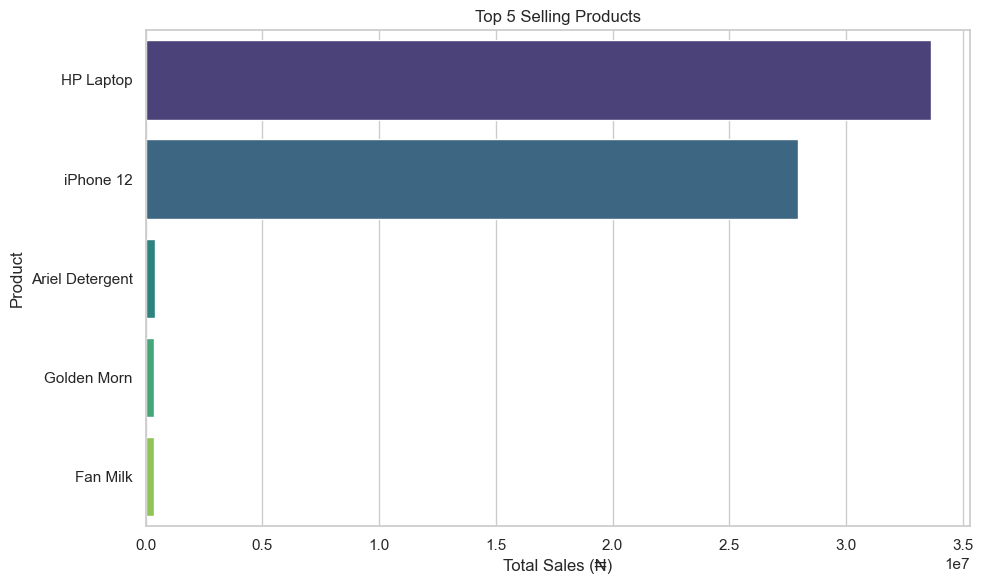

In [35]:
top_products = df.groupby("Product")["Total"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 5 Selling Products")
plt.xlabel("Total Sales (₦)")
plt.tight_layout()
plt.show()

C:\Users\seanm\AppData\Local\Temp\ipykernel_12252\1003042090.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_location.values, y=sales_by_location.index, palette="magma")


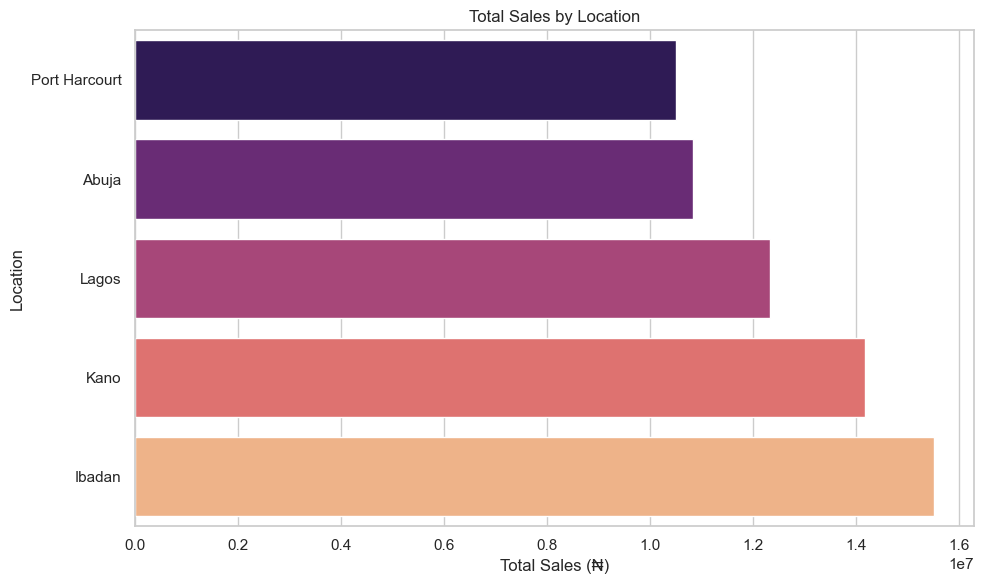

In [39]:
sales_by_location = df.groupby("Location")["Total"].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_location.values, y=sales_by_location.index, palette="magma")
plt.title("Total Sales by Location")
plt.xlabel("Total Sales (₦)")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

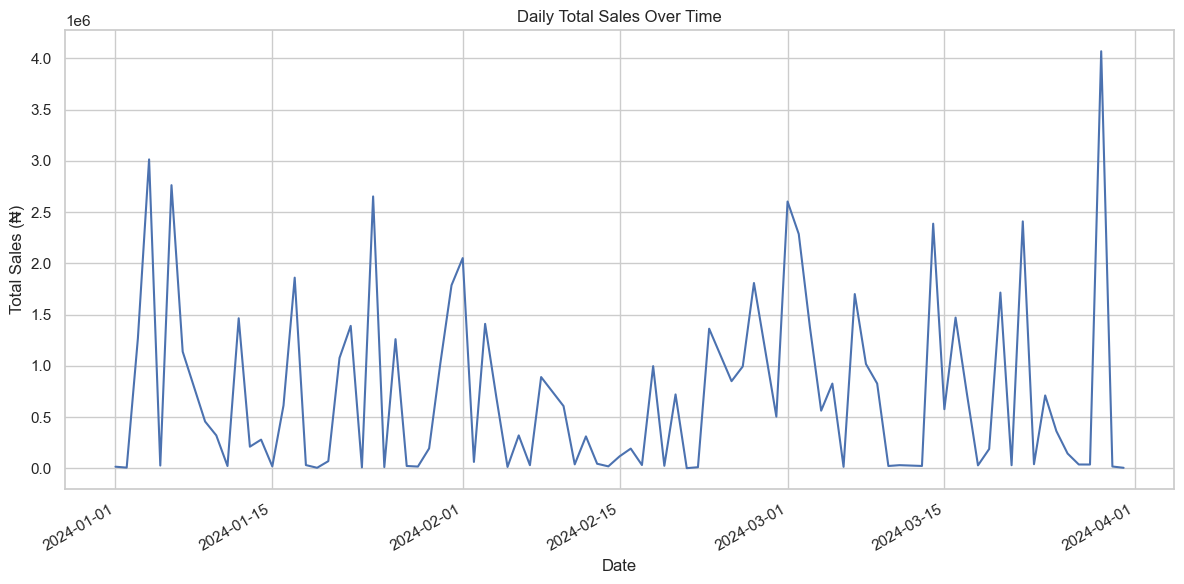

In [45]:
df["Date"] = pd.to_datetime(df["Date"])

daily_sales = df.groupby("Date")["Total"].sum()

plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title("Daily Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (₦)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\seanm\AppData\Local\Temp\ipykernel_12252\2012506640.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="coolwarm")


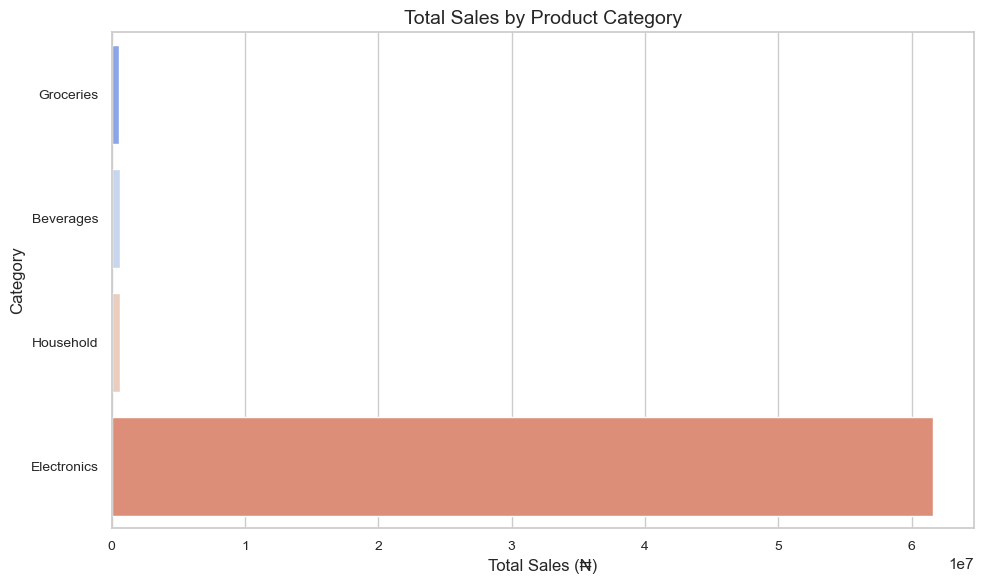

In [51]:
category_sales = df.groupby("Category")["Total"].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="coolwarm")
plt.title("Total Sales by Product Category", fontsize=14)
plt.xlabel("Total Sales (₦)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

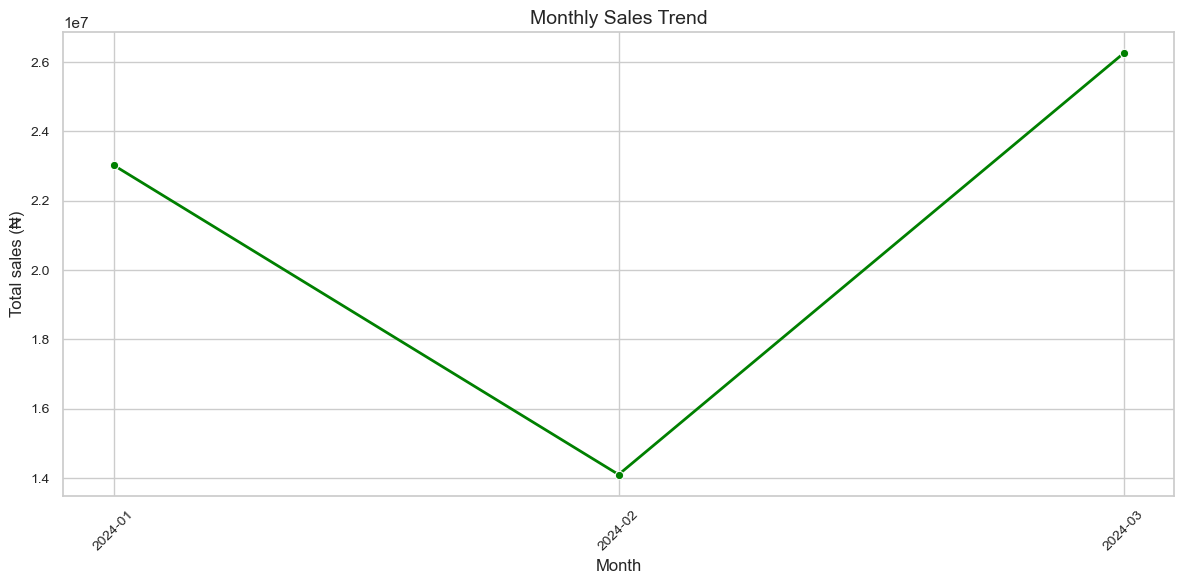

In [55]:
df["Month"] = df["Date"].dt.to_period("M").astype(str)
monthly_sales = df.groupby("Month")["Total"].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', linewidth=2, color='green')
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total sales (₦)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

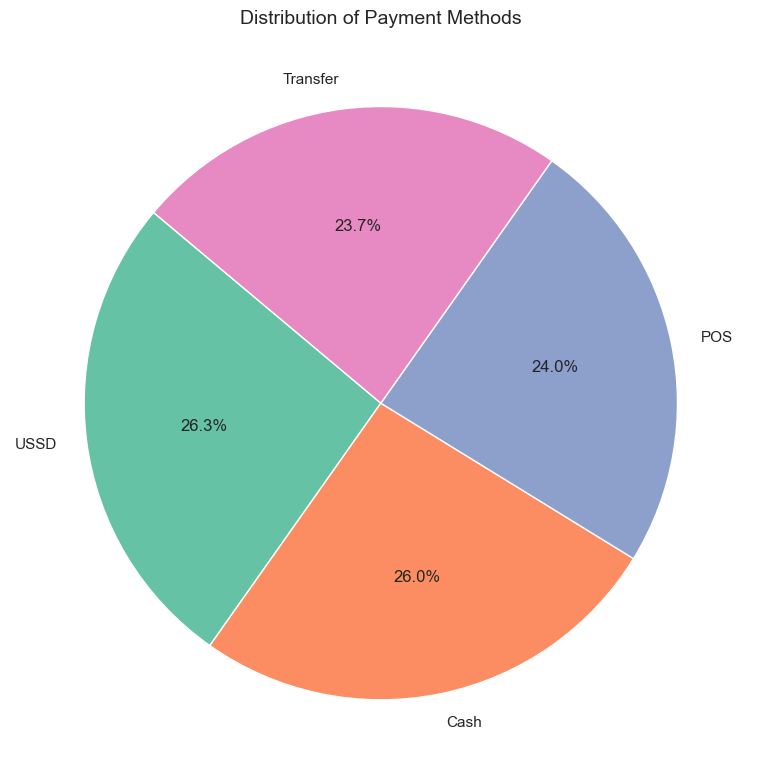

In [57]:
payment_dist = df["Payment Method"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_dist, labels=payment_dist.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Set2"))
plt.title("Distribution of Payment Methods", fontsize=14)
plt.tight_layout()
plt.show()